In [ ]:
import pandas as pd


file_ga = '../exp_rev/Results_GA_1000000_0.csv'
file_ilp = '../exp_rev/Results_ILP_1000000_0.csv'
file_cn = '../exp_rev/Results__1000000_0.csv'  # Partition/CN


def read_head_csv(filepath):
    try:
        df = pd.read_csv(filepath)
        print(f"Loaded {len(df)} rows from {filepath}")
        return df
    except Exception as e:
        print(f"Gagal membaca {filepath}: {e}")
        return None

head_ga = read_head_csv(file_ga)
head_ilp = read_head_csv(file_ilp)
head_cn = read_head_csv(file_cn)


print('GA:')
display(head_ga.head())
print('ILP:')
display(head_ilp.head())
print('Partition/CN:')
display(head_cn.head())

Loaded 827485 rows from ../exp_rev/Results_GA_1000000_0.csv
Loaded 827468 rows from ../exp_rev/Results_ILP_1000000_0.csv
Loaded 827468 rows from ../exp_rev/Results_ILP_1000000_0.csv
Loaded 827468 rows from ../exp_rev/Results__1000000_0.csv
GA:
Loaded 827468 rows from ../exp_rev/Results__1000000_0.csv
GA:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,1,COMP_M,7,7_35,M.USER.APP.7,56,148,55,100,NaN,4.5512,165.000089,169.551289,159.000000,165.000089
1,1,COMP_M,7,7_41,7_(35-41),148,154,100,100,7_35,2.7343,169.551289,172.285589,169.551289,169.551289
2,1,COMP_M,7,7_36,7_(35-36),148,149,100,100,7_35,3.3045,169.551289,172.855789,169.551289,169.551289
3,1,COMP_M,7,7_37,7_(35-37),148,150,100,100,7_35,2.1679,169.551289,171.719189,169.551289,169.551289
4,2,COMP_M,14,14_76,M.USER.APP.14,67,227,52,100,NaN,3.4261,172.000152,175.426252,161.000000,172.000152


ILP:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,2,COMP_M,14,14_76,M.USER.APP.14,67,436,52,52,NaN,59.688153,161.000000,220.688153,161.000000,161.000000
1,1,COMP_M,7,7_35,M.USER.APP.7,56,240,55,100,NaN,4.551200,165.000089,169.551289,159.000000,165.000089
2,1,COMP_M,7,7_41,7_(35-41),240,246,100,100,7_35,2.734300,169.551289,172.285589,169.551289,169.551289
3,1,COMP_M,7,7_36,7_(35-36),240,241,100,100,7_35,3.304500,169.551289,172.855789,169.551289,169.551289
4,1,COMP_M,7,7_37,7_(35-37),240,242,100,100,7_35,2.167900,169.551289,171.719189,169.551289,169.551289


Partition/CN:


,id,type,app,module,message,DES.src,DES.dst,TOPO.src,TOPO.dst,module.src,service,time_in,time_out,time_emit,time_reception
0,2,COMP_M,14,14_76,M.USER.APP.14,67,397,52,52,NaN,59.688153,161.000000,220.688153,161.000000,161.000000
1,1,COMP_M,7,7_35,M.USER.APP.7,56,205,55,100,NaN,4.551200,165.000089,169.551289,159.000000,165.000089
2,1,COMP_M,7,7_41,7_(35-41),205,240,100,100,7_35,2.734300,169.551289,172.285589,169.551289,169.551289
3,1,COMP_M,7,7_36,7_(35-36),205,211,100,100,7_35,3.304500,169.551289,172.855789,169.551289,169.551289
4,1,COMP_M,7,7_37,7_(35-37),205,217,100,100,7_35,2.167900,169.551289,171.719189,169.551289,169.551289


In [3]:
print("Jumlah baris GA:", len(head_ga))
print("Jumlah baris ILP:", len(head_ilp))
print("Jumlah baris Partition/CN:", len(head_cn))

def hitung_latensi(df, nama=''):    
    if df is None:
        print(f"Data {nama} tidak tersedia.")
        return None
    if 'time_emit' not in df.columns or 'time_in' not in df.columns:
        print(f"Kolom 'time_emit' atau 'time_in' tidak ditemukan di {nama}.")
        return None
    df = df.copy()
    df['latensi'] = df['time_in'] - df['time_emit']
    print(f"Rata-rata latensi {nama}: {df['latensi'].mean():.4f}")
    print(f"5 data latensi pertama {nama}:\n{df['latensi'].head()}")
    return df

# Hitung latensi untuk masing-masing hasil
head_ga = hitung_latensi(head_ga, 'GA')
head_ilp = hitung_latensi(head_ilp, 'ILP')
head_cn = hitung_latensi(head_cn, 'Partition/CN')

Jumlah baris GA: 827485
Jumlah baris ILP: 827468
Jumlah baris Partition/CN: 827468
Rata-rata latensi GA: 1.9909
5 data latensi pertama GA:
0     6.000089
1     0.000000
2     0.000000
3     0.000000
4    11.000152
Name: latensi, dtype: float64
Rata-rata latensi ILP: 4.8984
5 data latensi pertama ILP:
0    0.000000
1    6.000089
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64
Rata-rata latensi Partition/CN: 3.0004
5 data latensi pertama Partition/CN:
0    0.000000
1    6.000089
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64
Rata-rata latensi ILP: 4.8984
5 data latensi pertama ILP:
0    0.000000
1    6.000089
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64
Rata-rata latensi Partition/CN: 3.0004
5 data latensi pertama Partition/CN:
0    0.000000
1    6.000089
2    0.000000
3    0.000000
4    0.000000
Name: latensi, dtype: float64


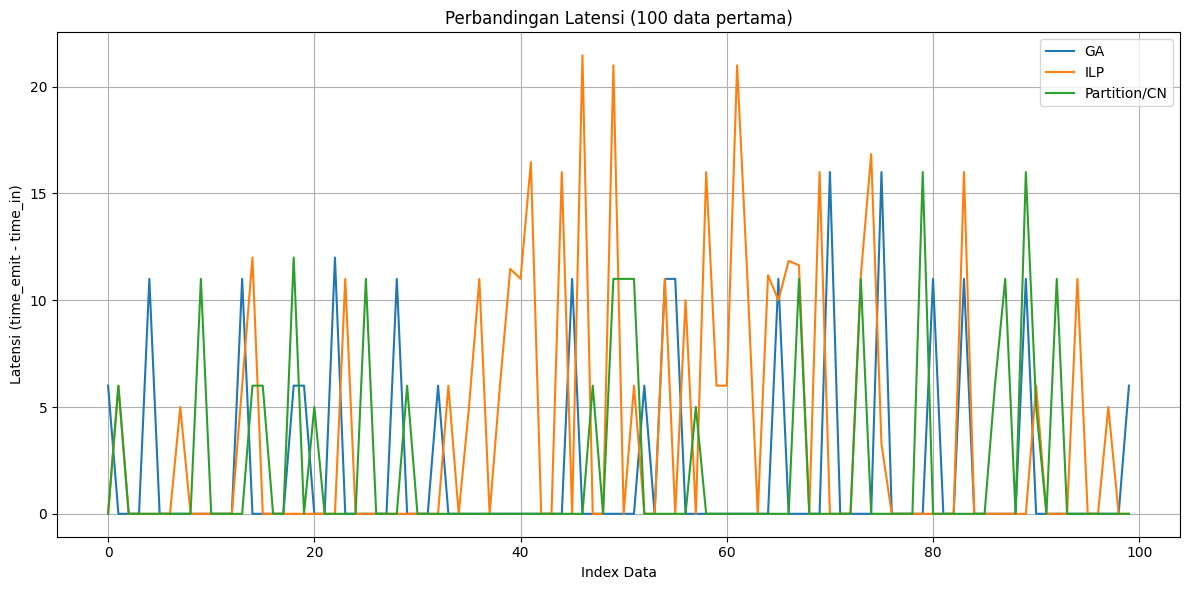

Plot perbandingan latensi telah disimpan sebagai 'perbandingan_latensi.png'


In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))

if head_ga is not None and 'latensi' in head_ga.columns:
    plt.plot(head_ga['latensi'].values[:100], label='GA')
if head_ilp is not None and 'latensi' in head_ilp.columns:
    plt.plot(head_ilp['latensi'].values[:100], label='ILP')
if head_cn is not None and 'latensi' in head_cn.columns:
    plt.plot(head_cn['latensi'].values[:100], label='Partition/CN')

plt.title('Perbandingan Latensi (100 data pertama)')
plt.xlabel('Index Data')
plt.ylabel('Latensi (time_emit - time_in)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('../exp_rev/perbandingan_latensi.png')
plt.show()
print("Plot perbandingan latensi telah disimpan sebagai 'perbandingan_latensi.png'")